# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [37]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [38]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
print("Tampilkan 5 baris pertama dari dataset:")
print(df.head())

Tampilkan 5 baris pertama dari dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0 

In [39]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Tampilkan informasi jumlah baris, kolom, dan jenis data:")
print(df.info())

Tampilkan informasi jumlah baris, kolom, dan jenis data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts        

In [40]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("Menampilkan statistik deskriptif dataset:")
print(df.describe())

Menampilkan statistik deskriptif dataset:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

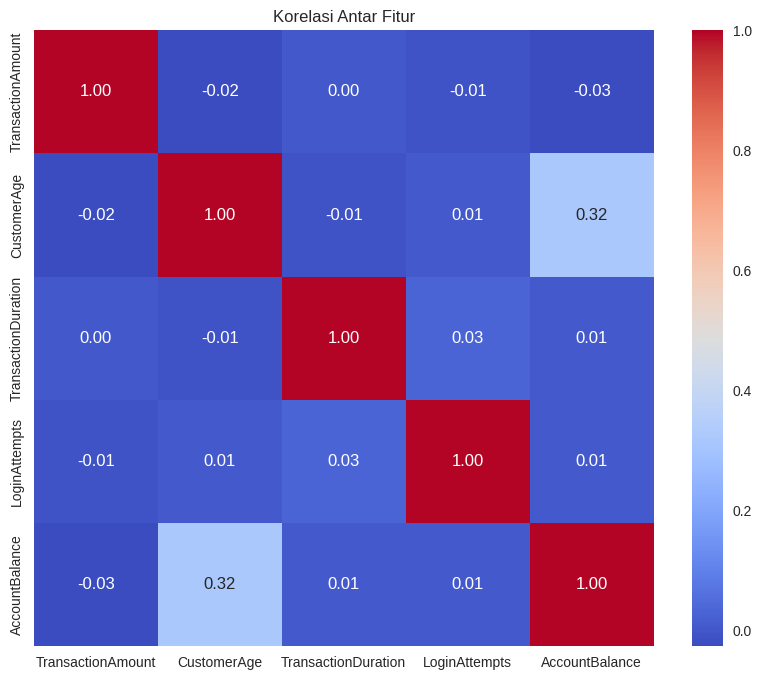

In [41]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

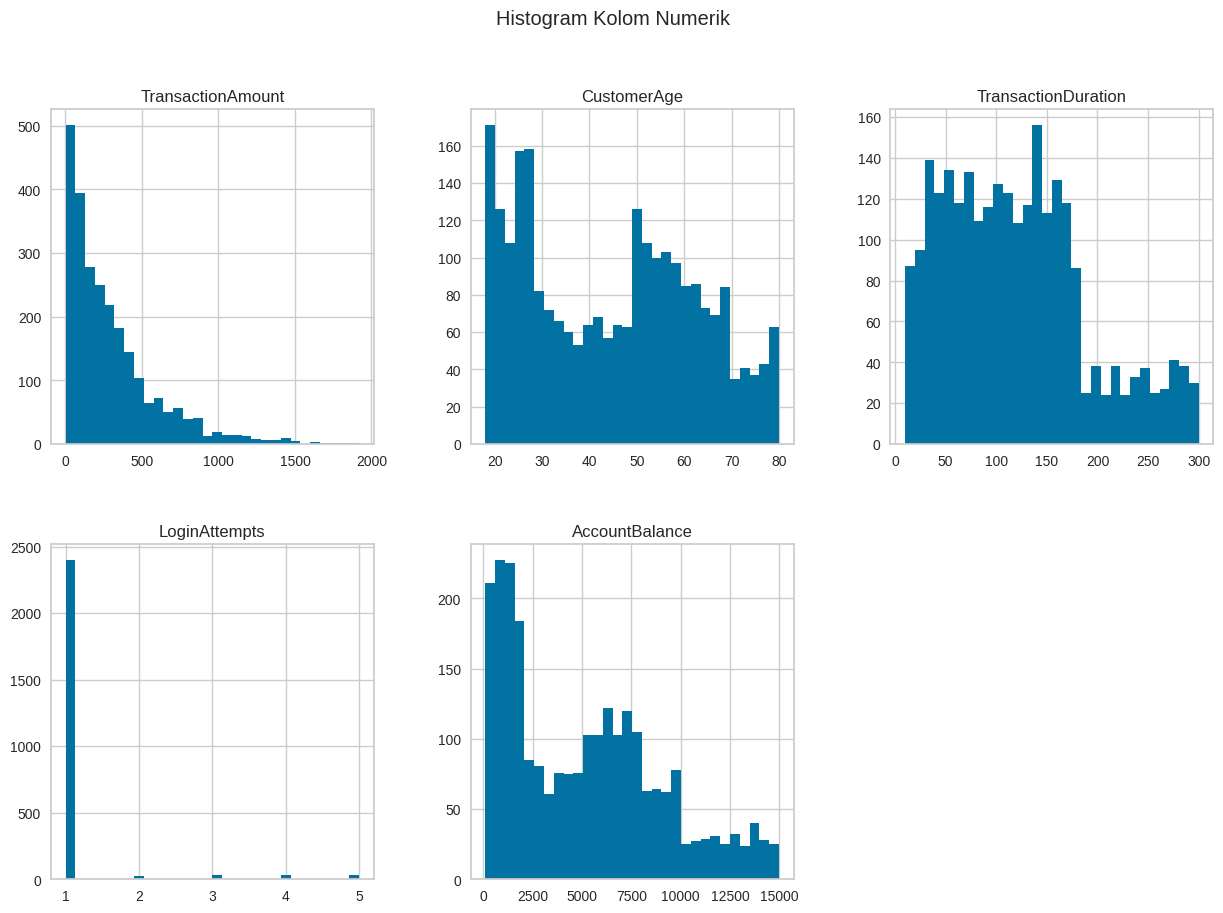

In [42]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(len(numeric_cols)//3+1, 3))
plt.suptitle('Histogram Kolom Numerik')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

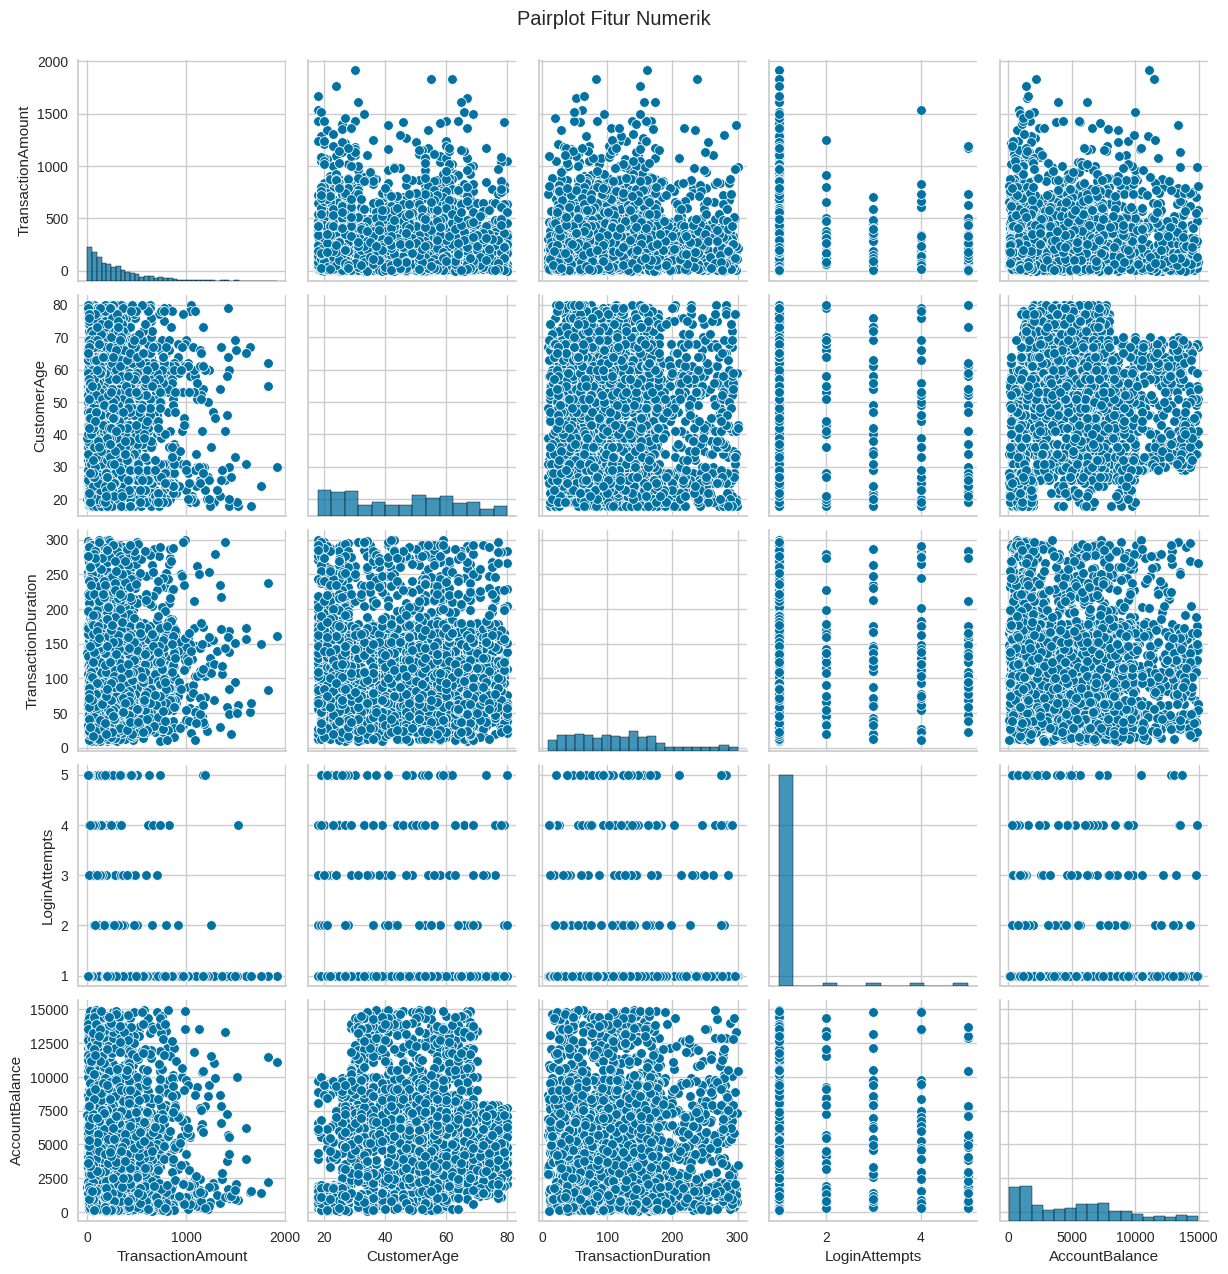

In [43]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot Fitur Numerik', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [44]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah nilai yang hilang (missing values) dalam setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang (missing values) dalam setiap kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [45]:
# Mengecek dataset menggunakan duplicated().sum()
print("Jumlah data duplikat dalam dataset:")
print(df.duplicated().sum())

Jumlah data duplikat dalam dataset:
21


In [46]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_cols = df.select_dtypes(include='number').columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Hasil scalling menggunakan MinMaxScaller :" )
print(df[numeric_cols].head())

Hasil scalling menggunakan MinMaxScaller :
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874          NaN             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


In [47]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()], inplace=True)

In [48]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print("Hasil encoding LabelEncoder:")
print(df[categorical_cols].head())

Hasil encoding LabelEncoder:
   TransactionDate  TransactionType  Location  Channel  CustomerOccupation  \
0              680                1        36        0                   0   
1             1178                1        15        0                   0   
2             1262                1        23        2                   3   
3              818                1        33        2                   3   
4             1939                0         1        2                   3   

   PreviousTransactionDate  
0                      105  
1                      192  
2                       41  
3                      163  
4                       16  


In [49]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
print("Daftar seluruh fitur yang tersedia setelah preprocessing:")
print(df.columns.tolist())

Daftar seluruh fitur yang tersedia setelah preprocessing:
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [50]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.fillna(df.median(numeric_only=True), inplace=True)

In [51]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

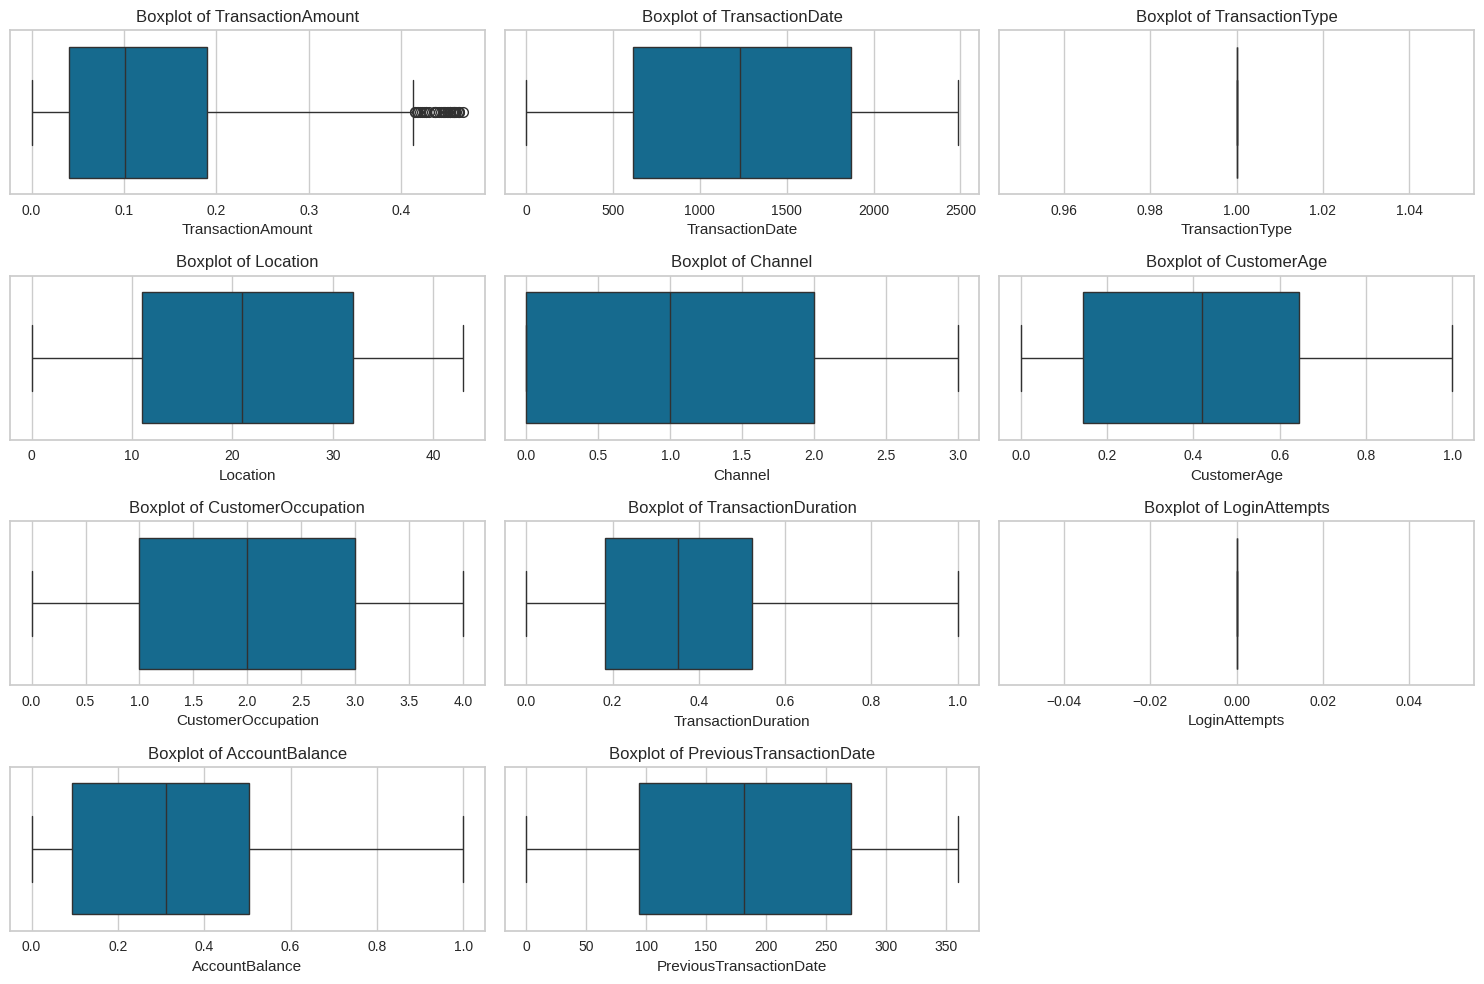

In [52]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Terapkan untuk satu atau dua fitur numerik utama (misalnya fitur pertama dan kedua)
outlier_cols = df.select_dtypes(include='number')
for col in outlier_cols:
    df = remove_outliers_iqr(df, col)

# Identifikasi Outlier: Visualisasikan outlier menggunakan boxplot untuk semua fitur numerik
numeric_cols = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [53]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
bin_feature = outlier_cols.columns[0]
bins = [0.0, 0.33, 0.66, 1.0]  # karena sudah di-scale MinMax, range 0 - 1
labels = ['Low', 'Medium', 'High']
df[bin_feature + '_binned'] = pd.cut(df[bin_feature], bins=bins, labels=labels, include_lowest=True)

le_bin = LabelEncoder()
df[bin_feature + '_binned_encoded'] = le_bin.fit_transform(df[bin_feature + '_binned'])

# Cek hasil binning dan encoding
print("Hasil binning dan encoding pada fitur:", bin_feature)
print(df[[bin_feature, bin_feature + '_binned', bin_feature + '_binned_encoded']].head())

Hasil binning dan encoding pada fitur: TransactionAmount
   TransactionAmount TransactionAmount_binned  \
0           0.007207                      Low   
1           0.195940                      Low   
2           0.065680                      Low   
3           0.096016                      Low   
5           0.047888                      Low   

   TransactionAmount_binned_encoded  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
5                                 0  


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [54]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
print("Deskripsi data setelah preprocessing:")
print(df.describe())

Deskripsi data setelah preprocessing:
       TransactionAmount  TransactionDate  TransactionType     Location  \
count        1743.000000      1743.000000           1743.0  1743.000000   
mean            0.129972      1241.395295              1.0    21.288583   
std             0.110533       729.014753              0.0    12.375159   
min             0.000000         0.000000              1.0     0.000000   
25%             0.040272       614.500000              1.0    11.000000   
50%             0.101160      1233.000000              1.0    21.000000   
75%             0.189882      1872.500000              1.0    32.000000   
max             0.467223      2485.000000              1.0    43.000000   

           Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  1743.000000  1743.000000         1743.000000          1743.000000   
mean      0.925990     0.424907            1.529547             0.375797   
std       0.841467     0.284644            1.150108       

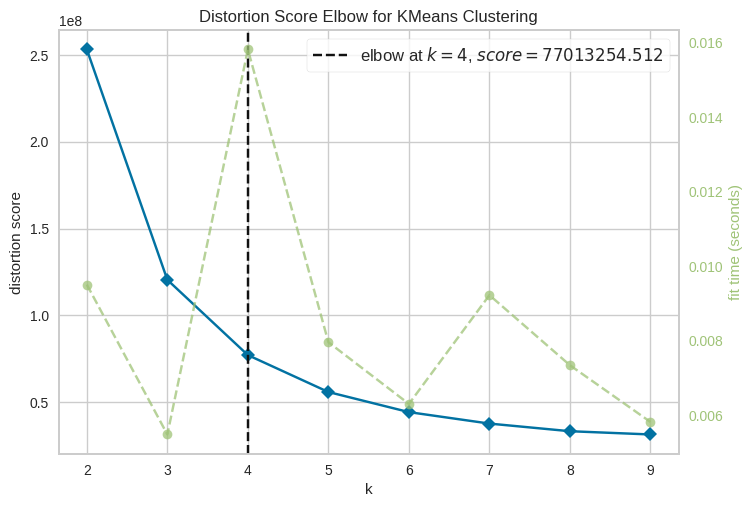

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df.select_dtypes(include='number'))
visualizer.show()

In [56]:
# Menggunakan algoritma K-Means Clustering
n_clusters_to_use = visualizer.elbow_value_

model_kmeans = KMeans(n_clusters=n_clusters_to_use, random_state=42, n_init=10)
df['cluster'] = model_kmeans.fit_predict(df.select_dtypes(include='number'))

Jalankan cell code ini untuk menyimpan model kamu.

In [57]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [58]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_score(df.select_dtypes(include='number'), df['cluster'])

np.float64(0.49828074998334976)

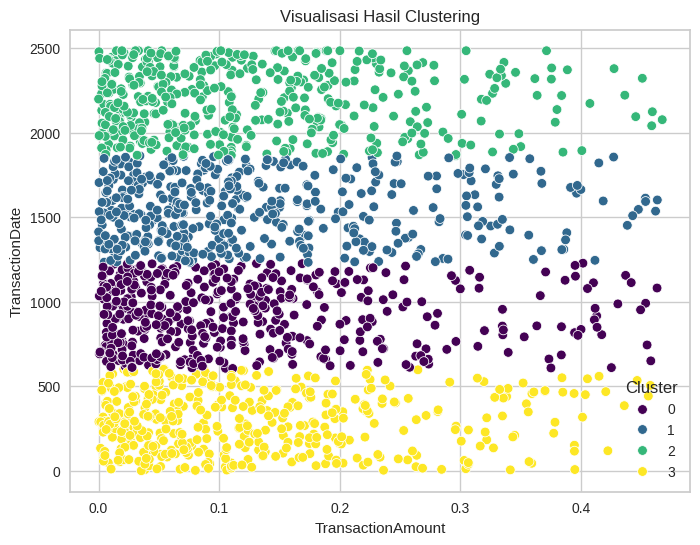

In [59]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df.select_dtypes(include='number').iloc[:, 0],
    y=df.select_dtypes(include='number').iloc[:, 1],
    hue=df['cluster'],
    palette='viridis',
)
plt.title('Visualisasi Hasil Clustering')
plt.xlabel(df.select_dtypes(include='number').columns[0])
plt.ylabel(df.select_dtypes(include='number').columns[1])
plt.legend(title='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [60]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# ___ = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(___)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.select_dtypes(include='number').drop(columns='cluster'))

df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
model_pca = KMeans(n_clusters=n_clusters_to_use, random_state=42, n_init=10)
model_pca.fit_predict(df_pca)

array([0, 0, 1, ..., 1, 3, 2], dtype=int32)

In [61]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(model_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [62]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('cluster')

df[numeric_cols + ['cluster']].groupby('cluster').agg(['mean', 'min', 'max']).round(2)

TransactionAmount            TransactionDate              \
                     mean  min   max            mean   min   max   
cluster                                                            
0                    0.13  0.0  0.46          917.43   605  1228   
1                    0.13  0.0  0.46         1540.33  1232  1863   
2                    0.13  0.0  0.47         2188.76  1864  2485   
3                    0.13  0.0  0.46          293.55     0   603   

        TransactionType         Location  ... LoginAttempts AccountBalance  \
                   mean min max     mean  ...           max           mean   
cluster                                   ...                                
0                   1.0   1   1    21.29  ...           0.0           0.33   
1                   1.0   1   1    20.79  ...           0.0           0.33   
2                   1.0   1   1    21.69  ...           0.0           0.36   
3                   1.0   1   1    21.38  ...           0.0           0.33   

                   PreviousTransactionDate           \
         min   max                    mean min  max   
cluster                                               
0        0.0  1.00                  175.73   0  360   
1        0.0  0.99                  181.26   0  360   
2        0.0  1.00                  185.51   0  360   
3        0.0  1.00                  184.71   1  360   

        TransactionAmount_binned_encoded          
                                    mean min max  
cluster                                           
0                                   0.08   0   1  
1                                   0.08   0   1  
2                                   0.07   0   1  
3                                   0.08   0   1  

[4 rows x 36 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1.  **Cluster 3 (Transaksi Paling Awal)**:
    -   **Rata-rata (mean) Transaction Date:** Sekitar 307.15
    -   Rentang Transaction Date: Minimum 0 hingga Maksimum 603.
    -   Analisis: Cluster ini berisi transaksi yang terjadi paling awal dalam periode dataset.

2.  **Cluster 0 (Transaksi Awal Menengah)**:
    -   **Rata-rata (mean) Transaction Date:** Sekitar 917.43
    -   Rentang Transaction Date: Minimum 605 hingga Maksimum 1228.
    -   **Analisis:** Transaksi di cluster ini terjadi setelah Cluster 3 tetapi sebelum Cluster 1.

3.  **Cluster 1 (Transaksi Akhir Menengah)**:
    -   **Rata-rata (mean) Transaction Date:** Sekitar 1540.33
    -   Rentang Transaction Date: Minimum 1232 hingga Maksimum 1863.
    -   **Analisis:** Transaksi di cluster ini terjadi setelah Cluster 0 tetapi sebelum Cluster 2.

4.  **Cluster 2 (Transaksi Paling Baru)**:
    -   **Rata-rata (mean) Transaction Date:** Sekitar 2188.76
    -   Rentang Transaction Date: Minimum 1864 hingga Maksimum 2485.
    -   **Analisis:** Cluster ini berisi transaksi yang terjadi paling baru dalam periode dataset.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [63]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'cluster' : 'Target'}, inplace=True)

In [64]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [65]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.inverse_transform(df[numeric_cols])
print("Tampilkan dataset yang sudah di-inverse :" )
print(df[numeric_cols].head())

Tampilkan dataset yang sudah di-inverse :
   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0           0.003367        1689800.0              2.0    1548.0      0.0   
1           0.091548        2927330.0              2.0     645.0      0.0   
2           0.030687        3136070.0              2.0     989.0      6.0   
3           0.044861        2032730.0              2.0    1419.0      6.0   
5           0.022374        1577975.0              2.0    1204.0      0.0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                 0.0             0.244828            0.0   
1     0.806452                 0.0             0.451724            0.0   
2     0.016129                12.0             0.158621            0.0   
3     0.129032                12.0             0.051724            0.0   
5     0.000000                12.0             0.558621            0.0   

   AccountBalance  PreviousTransactionDate  Transa

In [66]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
encoders = {}
df_encoded = df.copy()
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df_encoded[col] = encoders[col].fit_transform(df[col])

# Inverse transform ke bentuk kategori aslinya
df_inverse = df_encoded.copy()
for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))

# Tampilkan hasil inverse
print("Tampilkan dataset yang sudah di-inverse:")
print(df_inverse[categorical_cols].head())

Tampilkan dataset yang sudah di-inverse:
   TransactionDate  TransactionType  Location  Channel  CustomerOccupation  \
0        1689800.0              2.0    1548.0      0.0                 0.0   
1        2927330.0              2.0     645.0      0.0                 0.0   
2        3136070.0              2.0     989.0      6.0                12.0   
3        2032730.0              2.0    1419.0      6.0                12.0   
5        1577975.0              2.0    1204.0      0.0                12.0   

   PreviousTransactionDate  
0                  37800.0  
1                  69120.0  
2                  14760.0  
3                  58680.0  
5                   4680.0  


In [67]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numeric_cols = df_inverse.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_inverse.select_dtypes(include=['object', 'category']).columns.tolist()

# Agregasi untuk data numerik: mean, min, max
numeric_summary = df_inverse[numeric_cols].agg(['mean', 'min', 'max']).T
print("Statistik Deskriptif (Numerik):")
print(numeric_summary)

print("\nStatistik Deskriptif (Kategorikal - Modus):")
for col in categorical_cols:
    mode_val = df_inverse[col].mode()
    print(f"{col}: {mode_val.iloc[0] if not mode_val.empty else 'No mode found'}")

group_col = categorical_cols[0] if categorical_cols else None

if group_col:
    grouped_stats = df_inverse.groupby(group_col)[numeric_cols].agg(['mean', 'min', 'max'])
    print(f"\nAgregasi setelah groupby berdasarkan '{group_col}':")
    print(grouped_stats.head())
else:
    print("\nTidak ada kolom kategorikal untuk melakukan groupby.")

Statistik Deskriptif (Numerik):
                                          mean  min           max
TransactionAmount                 6.072600e-02  0.0  2.182969e-01
TransactionDate                   3.084867e+06  0.0  6.175225e+06
TransactionType                   2.000000e+00  2.0  2.000000e+00
Location                          9.154091e+02  0.0  1.849000e+03
Channel                           2.777969e+00  0.0  9.000000e+00
CustomerAge                       4.249070e-01  0.0  1.000000e+00
CustomerOccupation                6.118187e+00  0.0  1.600000e+01
TransactionDuration               3.757968e-01  0.0  1.000000e+00
LoginAttempts                     0.000000e+00  0.0  0.000000e+00
AccountBalance                    3.355284e-01  0.0  1.000000e+00
PreviousTransactionDate           6.544399e+04  0.0  1.296000e+05
TransactionAmount_binned_encoded  7.687894e-02  0.0  1.000000e+00

Statistik Deskriptif (Kategorikal - Modus):
TransactionAmount_binned: Low

Agregasi setelah groupby berdasark

<ipython-input-67-2463676987>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df_inverse.groupby(group_col)[numeric_cols].agg(['mean', 'min', 'max'])


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Low Transaction Amount)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - Transaction Amount: 0.051
  - Transaction Type : 1.58
  - Customer Age : 0.43
  - location : 913
  - Account Balance : 0.33
  - **Analisis:** Cluster ini terdiri dari pelanggan dengan jumlah transaksi kecil, usia menengah (sekitar 40-an), dan saldo akun rendah. Mereka mungkin adalah pengguna biasa yang tidak terlalu aktif bertransaksi atau hanya memakai akun sesekali.

2. **Cluster 2: (Medium Transaction Amount)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - Transaction Amount :0.183
  - Transaction Type : 1.44
  - Customer Age : 0.42
  - Account Balance : 0.336
  - **Analisis:** Cluster ini menunjukkan pelanggan yang melakukan transaksi lebih besar dari cluster Low, meskipun frekuensinya mungkin sedikit lebih jarang. Umurnya juga mirip (usia menengah), dan saldo pun serupa. Mereka mungkin pengguna yang lebih aktif dalam jumlah, bukan frekuensi.

3. **Cluster 2: (High Transaction Amount)**:
  - Semua Nilai NaN
  - **Analisis:** Tidak ada data di cluster ini, kemungkinan karena tidak ada pelanggan dengan kategori transaksi "High" di dataset saat ini.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [68]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse.rename(columns={'cluster' : 'Target'}, inplace=True)

In [69]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.